# Final Project Phase 2 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 2 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase I below. You may include additional cleaning functions if you have extra datasets. 


## Downloaded Dataset Requirement



In [ ]:
import csv
import json


def data_parser(data):
    with open(data) as f:
        ''''reader = pd.read_csv(f, nrows=156, header = 1, skiprows = range(2,452))
        # next(reader, None)  # skip the headers
        dic = {}
        for index, row in reader.iterrows():
        d = {}
        x = reader.to_dict('records')
        print(reader)
      '''
        counties = {}
        reader = csv.reader(f)
        header = next(reader)
        header = next(reader)[2:]
        for row in reader:
            if '0500000US13' in row[0]:
                name = row[1]
                find = name.index('County')
                name = name[:find].strip()
                counties[name.lower()] = {k: v for k, v in zip(header, row[2:])}
        # print(counties['Forsyth']['Total!!Estimate!!AGE!!Under 18 years!!5 to 17 years'])
        final = {}

        for i in counties:
            below_pov_lvl = float(
                counties[i]['Percent below poverty level!!Estimate!!Population for whom poverty status is determined'])
            u18_below_pv_lvl = float(counties[i]['Percent below poverty level!!Estimate!!AGE!!Under 18 years'])
            non_hs_grads = 100 * (int(counties[i][
                                          'Total!!Margin of Error!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than high school graduate']) / int(
                counties[i]['Total!!Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over']))
            final[i] = {'Total % below poverty level': below_pov_lvl,
                        '% below poverty level Under 18': u18_below_pv_lvl,
                        '% less than highschool graduate': round(non_hs_grads, 1)}
    with open('data_parser.json', 'w') as outfile:
        json.dump(final, outfile, indent=2)
    return final
    ############ Function Call ############


data_parser('data.csv')


## Web Collection Requirement \#1


In [ ]:
import requests
from bs4 import BeautifulSoup
import json
import re
def web_parser1():
  data = requests.get('https://en.wikipedia.org/wiki/2016_United_States_presidential_election_in_Georgia#By_county')
  soup = BeautifulSoup(data.text, 'html.parser')
  tables = soup.find_all('tbody') #{'class':'odswidget-table__records-tbody'})
  table = tables[14]
  countylist = 'Appling Atkinson Bacon Baker Baldwin Banks Barrow Bartow Ben Hill Berrien Bibb Bleckley Brantley Brooks Bryan Bulloch Burke Butts Calhoun Camden Candler Carroll Catoosa Charlton Chatham Chattahoochee Chattooga Cherokee Clarke Clay\
  Clayton Clinch Cobb Coffee Colquitt Columbia Cook Coweta Crawford Crisp Dade Dawson DeKalb, Decatur Dodge Dooly Dougherty Douglas Early Echols Effingham Elbert Emanuel Evans Fannin Fayette Floyd Forsyth Franklin Fulton Gilmer Glascock, Glynn \
  Gordon Grady Greene Gwinnett Habersham Hall Hancock Haralson Harris Hart Heard Henry Houston Irwin Jackson Jasper Jeff Davis Jefferson Jenkins Johnson Jones Lamar Lanier Laurens Lee Liberty Lincoln Long Lowndes Lumpkin Macon Madison Marion McDuffie \
  McIntosh Meriwether Miller Mitchell Monroe Montgomery Morgan Murray Muscogee Newton Oconee Oglethorpe Paulding Peach Pickens Pierce Pike Polk Pulaski Putnam Quitman Rabun Randolph Richmond Rockdale Schley Screven Seminole Spalding Stephens Stewart Sumter Talbot \
  Taliaferro Tattnall Taylor Telfair Terrell Thomas Tift Toombs Towns Treutlen Troup Turner Twiggs Union Upson Walker Walton Ware Warren Washington Wayne Webster Wheeler White Whitfield Wilcox Wilkes Wilkinson Worth'
  final = {}
  info = table.text
  info = info.strip().split()
  for county in info[8:]:
      cdict = {}
      cdict = {}
      if info.index(county) != 1281:
        if info[info.index(county) + 1] in countylist and county in countylist and info.index(county) != 1280:
            cdict['Clinton %'] = float(re.sub('%','',info[info.index(county) + 2]))
            cdict['Clinton Votes'] = int(re.sub(',','',info[info.index(county) + 3]))
            cdict['Trump %'] = float(re.sub('%','',info[info.index(county) + 4]))
            cdict['Trump Votes'] = int(re.sub(',','',info[info.index(county) + 5]))
            cdict['Others %'] = float(re.sub('%','',info[info.index(county) + 6]))
            cdict['Other Votes'] = int(re.sub(',','',info[info.index(county) + 7]))
            cdict['Total Votes'] = int(re.sub(',','',info[info.index(county) + 8]))
            final[county.lower() + ' ' +info[info.index(county) + 1].lower()] = cdict
      if county[0] in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' and (county in countylist) and county not in ['Jeff', 'Davis', 'Ben', 'Hill']:
          cdict['Clinton %'] = float(re.sub('%','',info[info.index(county) + 1]))
          cdict['Clinton Votes'] = int(re.sub(',','',info[info.index(county) + 2]))
          cdict['Trump %'] = float(re.sub('%','',info[info.index(county) + 3]))
          cdict['Trump Votes'] = int(re.sub(',','',info[info.index(county) + 4]))
          cdict['Others %'] = float(re.sub('%','',info[info.index(county) + 5]))
          cdict['Other Votes'] = int(re.sub(',','',info[info.index(county) + 6]))
          cdict['Total Votes'] = int(re.sub(',','',info[info.index(county) + 7]))
          final[county.lower()] = cdict 
  with open('html_parser.json', 'w') as outfile:
    json.dump(final, outfile, indent = 2)
  return final  


web_parser1()

## Web Collection Requirement #2

In [ ]:
import requests, json
import pandas as pd

def web_parser2():
    api = requests.get('https://public.opendatasoft.com/api/records/1.0/search/?dataset=usa-2016-presidential-election-by-county&q=&rows=159&facet=state&facet=county&facet=precincts&refine.state=Georgia').content
    data = json.loads(api)
    #county = {}
    df = pd.json_normalize(data['records'])
    df = df.set_index('fields.name_16').sort_index()
    cleaned_df = df.dropna(axis=1)
    uppercase = cleaned_df.to_dict(orient='index')
    county = dict((k.lower(), v) for k, v in uppercase.items())
    for i in county:
        try:
            del county[i]['datasetid']
            del county[i]['recordid']
            del county[i]['record_timestamp']
        except:
            continue
    '''for i in data['records']:
        county[i['fields']['name_16'].lower()]=i['fields']
    for i in county:
        try:
            del county[i]['geo_shape']
            del county[i]['temp_bins']
        except:
            continue'''
    with open('web_parser2.json', 'w') as outfile:
        json.dump(county, outfile, indent=2)
    return county
############ Function Call ############
web_parser2()

## Web Collection Requirement *Additional* (API) \#3

In [ ]:
import requests
import json
def web_parser3():
  data = requests.get('https://services1.arcgis.com/bqfNVPUK3HOnCFmA/arcgis/rest/services/Coronavirus_Cases_in_Georgia/FeatureServer/0/query?where=1%3D1&outFields=OBJECTID,CountyName,NumberReportedCases,Deaths,CaseRate,Hospitalizations&outSR=4326&f=json')
  covid = data.json()
  countylist = 'Appling Atkinson Bacon Bartow Baker Baldwin Banks Barrow Ben Hill Berrien Bibb Bleckley Brantley Brooks Bryan Bulloch Burke Butts Calhoun Camden Candler Carroll Catoosa Charlton Chatham Chattahoochee Chattooga Cherokee Clarke Clay\
  Clayton Clinch Cobb Coffee Colquitt Columbia Cook Coweta Crawford Crisp Dade Dawson DeKalb, Decatur Dodge Dooly Dougherty Douglas Early Echols Effingham Elbert Emanuel Evans Fannin Fayette Floyd Forsyth Franklin Fulton Gilmer Glascock, Glynn \
  Gordon Grady Greene Gwinnett Habersham Hall Hancock Haralson Harris Hart Heard Henry Houston Irwin Jackson Jasper Jeff Davis Jefferson Jenkins Johnson Jones Lamar Lanier Laurens Lee Liberty Lincoln Long Lowndes Lumpkin Macon Madison Marion McDuffie \
  McIntosh Meriwether Miller Mitchell Monroe Montgomery Morgan Murray Muscogee Newton Oconee Oglethorpe Paulding Peach Pickens Pierce Pike Polk Pulaski Putnam Quitman Rabun Randolph Richmond Rockdale Schley Screven Seminole Spalding Stephens Stewart Sumter Talbot \
  Taliaferro Tattnall Taylor Telfair Terrell Thomas Tift Toombs Towns Treutlen Troup Turner Twiggs Union Upson Walker Walton Ware Warren Washington Wayne Webster Wheeler White Whitfield Wilcox Wilkes Wilkinson Worth'
  final = {}
  counties = covid['features']
  for dic in counties:
    subfinal = {}
    county = dic['attributes']
    if county['CountyName'] in countylist:
      subfinal['Reported Cases'] = county['NumberReportedCases']
      subfinal['Reported Deaths'] = county['Deaths']
      subfinal['Case Rate'] = county['CaseRate']
      subfinal['Hospitalizations'] = county['Hospitalizations']
      final[county['CountyName'].strip().lower()] = subfinal
  with open('web_parser3additional.json', 'w') as outfile:
        json.dump(final, outfile, indent=2)
  return final

############ Function Call ############
web_parser3()

{'appling': {'Case Rate': 6524.43,
  'Hospitalizations': 106,
  'Reported Cases': 1211,
  'Reported Deaths': 39},
 'atkinson': {'Case Rate': 6038.42,
  'Hospitalizations': 70,
  'Reported Cases': 503,
  'Reported Deaths': 8},
 'bacon': {'Case Rate': 5769.91,
  'Hospitalizations': 52,
  'Reported Cases': 658,
  'Reported Deaths': 18},
 'baker': {'Case Rate': 3273.43,
  'Hospitalizations': 21,
  'Reported Cases': 102,
  'Reported Deaths': 6},
 'baldwin': {'Case Rate': 5489.78,
  'Hospitalizations': 177,
  'Reported Cases': 2439,
  'Reported Deaths': 68},
 'banks': {'Case Rate': 3287.96,
  'Hospitalizations': 81,
  'Reported Cases': 657,
  'Reported Deaths': 9},
 'barrow': {'Case Rate': 3346.72,
  'Hospitalizations': 289,
  'Reported Cases': 2891,
  'Reported Deaths': 56},
 'bartow': {'Case Rate': 3713.97,
  'Hospitalizations': 351,
  'Reported Cases': 4114,
  'Reported Deaths': 98},
 'ben hill': {'Case Rate': 5479.12,
  'Hospitalizations': 95,
  'Reported Cases': 912,
  'Reported Deaths'

#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase I, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. 

2. 

3. 

4. (if applicable)

5. (if applicable)


## Data Sources

Include sources (as links) to your datasets.

*   Downloaded Dataset Source(**CSV**): https://data.census.gov/cedsci/table?q=college%20poverty%20appling&g=0100000US.050000&tid=ACSST1Y2019.S1701&hidePreview=false
*   Web Collection #1 Source(**HTML**): https://en.wikipedia.org/wiki/2016_United_States_presidential_election_in_Georgia
*   Web Collection #2 Source(**API**): https://public.opendatasoft.com/explore/dataset/usa-2016-presidential-election-by-county/table/?disjunctive.state&refine.state=Georgia&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQVZHIiwieUF4aXMiOiJyZXAxNl9mcmFjIiwic2NpZW50aWZpY0Rpc3BsYXkiOnRydWUsImNvbG9yIjoiI0U5MUQwRSJ9LHsidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJBVkciLCJ5QXhpcyI6ImRlbTE2X2ZyYWMiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiIjMjMyMDY2In1dLCJ4QXhpcyI6InN0YXRlIiwibWF4cG9pbnRzIjoyMDAsInNvcnQiOiIiLCJjb25maWciOnsiZGF0YXNldCI6InVzYS0yMDE2LXByZXNpZGVudGlhbC1lbGVjdGlvbi1ieS1jb3VudHkiLCJvcHRpb25zIjp7ImRpc2p1bmN0aXZlLnN0YXRlIjp0cnVlLCJyZWZpbmUuc3RhdGUiOiJHZW9yZ2lhIn19fV0sInRpbWVzY2FsZSI6IiIsImRpc3BsYXlMZWdlbmQiOnRydWUsImFsaWduTW9udGgiOnRydWV9
*   Web Collection #3 Source **Additional** (**API**): https://opendata.atlantaregional.com/datasets/f239d3d2d9874cda9d75cf652158068c_0/geoservice



# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Export aggregated data to at least 2 summary files 

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

# Merging Dictionary

In [ ]:
dp = open('data_parser.json')
edu = json.load(dp)
w1 = open('html_parser.json')
election = json.load(w1)
w2 = open('web_parser2.json')
opendata = json.load(w2)
w3 = open('web_parser3additional.json')
covid = json.load(w3)
agg = edu.copy()
for i in agg:
  agg[i].update(election[i])
  agg[i].update(opendata[i])  
  agg[i].update(covid[i])    
print(agg)

{'appling': {'Total % below poverty level': 20.9, '% below poverty level Under 18': 25.2, '% less than highschool graduate': 2.8, 'Clinton %': 20.47, 'Clinton Votes': 1434, 'Trump %': 78.43, 'Trump Votes': 5494, 'Others %': 1.1, 'Other Votes': 77, 'Total Votes': 7005, 'fields.unemployment': 0.10300000000000001, 'fields.other08': 65, 'fields.median_age': 39.0, 'fields.dem12': '1758', 'fields.other08_frac': 0.009291023441966001, 'fields.asian': 0.85, 'fields.rep08_frac': 72.68439108061749, 'fields.management_professional_and_related_occupations': 25.15, 'fields.total_population': 18053, 'fields.votes': 7003, 'fields.rep16_frac': 78.42353277166929, 'fields.black': 18.65, 'fields.dem12_frac2': 0.251466170791017, 'fields.white_not_latino_population': 72.0, 'fields.graduate_degree': 3.2, 'fields.statecode_prev': '13', 'fields.other12': 95, 'fields.sales_and_office_occupations': 19.05, 'fields.gini_coefficient': 0.422, 'fields.amerindian': 0.1, 'fields.preschool_enrollment_ratio_enrolled_ages

## Insights

In [ ]:
def insight1():
  import pandas as pd
  import json

  politic = json.load(open('html_parser.json', 'r'))
  case = json.load(open('web_parser3additional.json', 'r'))

  pdf = pd.DataFrame(politic)
  cdf = pd.DataFrame(case)

  final = pd.concat([pdf, cdf])
  final = final.T

  dem = final[final['Clinton %'] > final['Trump %']]
  rep = final[final['Clinton %'] < final['Trump %']]

  demhosp = dem.mean()['Hospitalizations']
  #546.68
  rephosp = rep.mean()['Hospitalizations']
  #106.18
  return (round(demhosp, 2), round(rephosp, 2))





############ Function Call ############
insight1()

(578.52, 115.41)

### Insight 1 Explanation

This insight provides the average of hospitalizations due to Covid-19 in both counties that voted for Clinton in 2016 (demhosp) and counties that voted for Trump (rephosp). This was meant to provide an insight regarding whether political beliefs can suggest Covid prevalence. Our original hypothesis that the hospitalization rate would be lower in democrat counties than republican counties, based on current news and events, was incredibly incorrect. The first value in the tuple is the average hospitalizations in democrat counties which is over 400 people higher than the average hospitalizations in republican counties. This is interesting and could be a byproduct of population as seen in insight 3.

In [ ]:
def insight2():
  import pandas as pd
  import json

  demo = json.load(open('web_parser2.json', 'r'))
  politic = json.load(open('html_parser.json', 'r'))

  pdf = pd.DataFrame(politic)
  ddf = pd.DataFrame(demo)

  final = pd.concat([pdf, ddf])
  final = final.T

  dems = final[final['Clinton %'] > final['Trump %']]
  reps = final[final['Clinton %'] < final['Trump %']]

  deminfo = dems.sum()
  demvotes = deminfo['Total Votes']
  dempop = deminfo['fields.total_population']
  demvoterturnout = round((demvotes / dempop)*100, 2) #42.7%

  repinfo = reps.sum()
  repvotes = repinfo['Total Votes']
  reppop = repinfo['fields.total_population']
  repvoterturnout = round((repvotes / reppop)*100, 2) #42.61%

  return (demvoterturnout, repvoterturnout)





############ Function Call ############
insight2()

(42.7, 42.61)

### Insight 2 Explanation

This insight returns a tuple of two percentages, the first one being the percentage of voter turnout across all democrat counties and the second one is the voter turnout across all republican counties. I calculated this by finding the sum of total votes in all counties that voted either democrat or republican and divided this value by the sum of total populations in these counties. What we found is that voter turnout was almost exactly the same in all counties regardless of which candidate they voted for. This is an important insight because voter turnout was key in the 2020 election and this information could provide a valuable prediction as to who would win Georgia's electoral votes. 

In [ ]:
def insight3():
  import pandas as pd
  import json
  from pprint import pprint

  demo = json.load(open('web_parser2.json', 'r'))
  case = json.load(open('web_parser3additional.json', 'r'))

  ddf = pd.DataFrame(demo)
  cdf = pd.DataFrame(case)

  final = pd.concat([ddf, cdf])
  final = final.T

  percentpopinhosp = []

  for i in final.index:
    pop = final.loc[i, 'fields.total_population']
    hosp = final.loc[i, 'Hospitalizations']
    perc = round((hosp/pop)*100, 2)
    percentpopinhosp.append(perc)

  ser = pd.Series(percentpopinhosp)
  mean = ser.mean() #.3601%
  min = ser.min() #0.11%
  max = ser.max() #1.51%

  return (ser, mean, min, max)





############ Function Call ############
insight3()

(0      0.59
 1      0.85
 2      0.48
 3      0.58
 4      0.38
        ... 
 154    0.34
 155    0.59
 156    0.41
 157    0.70
 158    0.49
 Length: 159, dtype: float64, 0.38584905660377355, 0.11, 1.51)

### Insight 3 Explanation

This insight builds off of insight 1. What is returned is the percent of hospitalizations out of total population in each county as a list, as well as the minimum, maximum and average of these values. Overall the percent of hospitalizations is similar across the board, there is only one county over 1%. This suggests that while the findings in insight 1 were surprising, it is simply because the counties that voted democrat must have a larger population since the percent of the population hospitalized is similar. This is surprising though because our original hypothesis was that republican counties would have a higher hospitalization rate. This insight proves this wrong and demonstrates that Covid hospitalizations are similar across the board.

In [ ]:
def insight4():
  import pandas as pd
  import json

  politic = json.load(open('html_parser.json', 'r'))
  poverty = json.load(open('data_parser.json', 'r'))

  pdf = pd.DataFrame(politic)
  povdf = pd.DataFrame(poverty)

  final = pd.concat([pdf, povdf])
  final = final.T

  dem = final[final['Clinton %'] > final['Trump %']]
  rep = final[final['Clinton %'] < final['Trump %']]

  print ("Average % below poverty level: ",(dem['Total % below poverty level'].mean(),rep['Total % below poverty level'].mean()))

  print ("Average % below poverty level Under 18: ",(dem["% below poverty level Under 18"].mean(),rep["% below poverty level Under 18"].mean()))
  
  print ("Average % less than highschool graduate: ",(dem["% less than highschool graduate"].mean(),rep["% less than highschool graduate"].mean()))





############ Function Call ############
insight4()

Average % below poverty level:  (26.01935483870968, 21.272656249999994)
Average % below poverty level Under 18:  (38.03548387096775, 30.2421875)
Average % less than highschool graduate:  (2.2193548387096778, 2.5890625)


### Insight 4 Explanation

This insight involves comparing the income and educational inequality statistics of democrat and republican counties. The printed values for each statistic is a tuple with the left value being the average for democrats and the right one being the average for republicans. The findings are similar to what we expected, with the left leaning counties having a slightly higher proportion of impoverished populations across all age groups. However, what was interesting is that while democratic counties had a greater poverty level, the republican counties on average had a slightly higher population of non-highschool graduates.

In [ ]:
def insight5():
  import pandas as pd
  import json

  politic = json.load(open('html_parser.json', 'r'))
  unemp = json.load(open('web_parser2.json', 'r'))

  pdf = pd.DataFrame(politic)
  udf = pd.DataFrame(unemp)

  final = pd.concat([pdf, udf])
  final = final.T

  dem = final[final['Clinton %'] > final['Trump %']]
  rep = final[final['Clinton %'] < final['Trump %']]

  print( "Average Unemployment Rate:",(dem['fields.unemployment'].mean(),rep['fields.unemployment'].mean()))
  
'''
  import pandas as pd
  import json

  income = json.load(open('web_parser2.json', 'r'))
  covid = json.load(open('web_parser3additional.json', 'r'))

  idf = pd.DataFrame(income).loc[['fields.median_earnings_2010_dollars']]
  cdf = pd.DataFrame(covid).loc[['Case Rate']]

  final = pd.concat([idf, cdf])
  final = final.T

 #dem = final[final['Clinton %'] > final['Trump %']]
  #rep = final[final['Clinton %'] < final['Trump %']]

  return final
'''


############ Function Call ############
insight5()

Average Unemployment Rate: (0.10770967741935485, 0.09895312500000002)


### Insight 5 Explanation

In this insight, we compare the unemployment rate of democratic and republican counties. The results are suprising, primariliary because of how little of a difference is between the two. The hypothesis was that democratic counties would have higher unemployment rates than republican counties but the results show that there is little to no difference on unemployment rate between democratic and republican counties.

## Data Visualizations

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


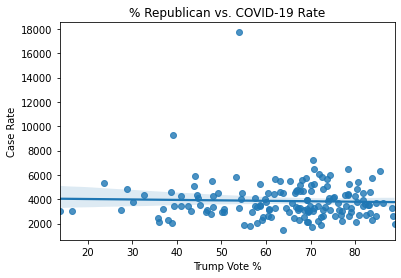

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def visual1():
  labels = []
  trump = []
  cases = []
  for i in agg:
    trump.append(agg[i]['Trump %'])
    cases.append(agg[i]['Case Rate'])
    labels.append(i)
  '''plt.scatter(trump,cases, label= 'County')
  plt.xlabel('Trump Vote %')
  plt.ylabel('Case Rate')
  plt.title('% Republican vs. COVID-19 Rate')
  plt.plot()
  line_of_best_fit = np.poly1d(np.polyfit(trump, cases, 1))
  plt.plot(trump, line_of_best_fit(trump))
  plt.legend()
  plt.show()'''
  graph = sns.regplot(trump,cases).set(xlabel='Trump Vote %', ylabel='Case Rate')
  plt.title('% Republican vs. COVID-19 Case Rate')
  plt.show(graph)
  




############ Function Call ############
visual1()

### Visualization 1 Explanation

This scatter plot shows a comparison between the primary voter base of the counties in Georgia plotted against the COVID-19 infection rates for each respective county. In particular, this visual shows that case rates are consistent regardless of the percentage of Trump vote which goes against our original hypothesis that counties with a higher Trump vote will have a higher case rate as well.

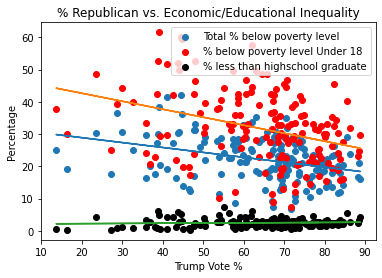

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def visual2():
  labels = []
  x = []
  y = []
  z = []
  a = []
  for i in agg:
    x.append(agg[i]['Trump %'])
    y.append(agg[i]['Total % below poverty level'])
    z.append(agg[i]['% below poverty level Under 18'])
    a.append(agg[i]['% less than highschool graduate'])
    labels.append(i)

  plt.scatter(x,y, label= 'Total % below poverty level')
  plt.scatter(x,z, label= '% below poverty level Under 18', c='r')
  plt.scatter(x,a, label= '% less than highschool graduate', c='k')
  plt.xlabel('Trump Vote %')
  plt.ylabel('Percentage')
  plt.title('% Republican vs. Economic/Educational Inequality')
  lofy=np.poly1d(np.polyfit(x, y, 1))
  lofz=np.poly1d(np.polyfit(x, z, 1))
  lofa=np.poly1d(np.polyfit(x, a, 1))
  plt.plot(x, lofy(x))
  plt.plot(x, lofz(x))
  plt.plot(x, lofa(x))
  plt.legend()
  plt.show()






############ Function Call ############
visual2()

### Visualization 2 Explanation

This visual is a scatterplot that depicts the percentage living below the poverty line and the percentage less than a highschool graduate for each county in Georgia in terms of how many people voted for Trump in that county. A high trump vote designates republican while a lower trump vote is thought to be democratic. Based on the line of best fit, we can see that the higher the percent Trump vote of the county, the lower the poverty level. This applies to all age groups. When we look at the percent that are less than a highschool grduate in each county, we see that there is little to no difference as we move from more left leaning counties to more right leaning. 

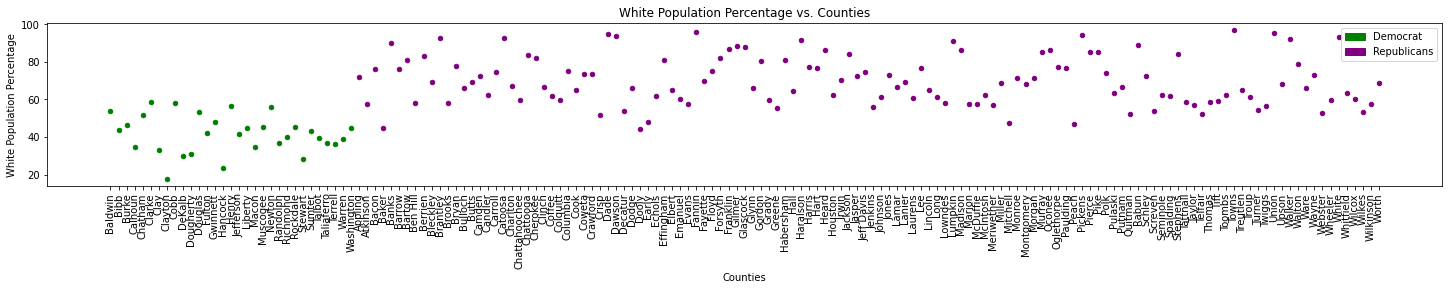

In [ ]:
import pandas as pd
import json
import matplotlib.patches as mpatch
import matplotlib.pyplot as plt
def visual3():
  politic = json.load(open('html_parser.json', 'r'))
  demo = json.load(open('web_parser2.json', 'r'))

  pdf = pd.DataFrame(politic)
  ddf = pd.DataFrame(demo)
  total = pd.concat([pdf, ddf])

  total = total.T
  clinton = total[total['Clinton %'] > total['Trump %']]
  trump = total[total['Trump %'] > total['Clinton %']]

  plt.figure(figsize=(25,3))
  ax1 = plt.gca()
  clinton.plot(kind = 'scatter', x = 'fields.name_prev', y = 'fields.white_not_latino_population', ax = ax1, color = 'green')
  trump.plot(kind = 'scatter', x = 'fields.name_prev', y = 'fields.white_not_latino_population', ax = ax1, color = 'purple')
  plt.xlabel('Counties')
  plt.ylabel('White Population Percentage')
  plt.title('White Population Percentage vs. Counties')
  green = mpatch.Patch(color = 'green', label = 'Democrat')
  purp = mpatch.Patch(color = 'purple', label = 'Republicans')
  plt.legend(handles = [green, purp])
  ax1.tick_params(axis = 'x', rotation = 90)
  plt.show()





############ Function Call ############
visual3()

### Visualization 3 Explanation

This visual demonstrates that there is a clear difference between white populations in counties by percentage that voted Democrat in 2016 and counties that voted Republican. It is evident that the counties that voted Democrat (shown in green) have a significantly lower white population percentage than counties that voted Republican.

## Summary Files

In [46]:
def summary1():
  #Series from insight 3
  import pandas as pd
  import json
  from pprint import pprint

  demo = json.load(open('web_parser2.json', 'r'))
  case = json.load(open('web_parser3additional.json', 'r'))

  ddf = pd.DataFrame(demo)
  cdf = pd.DataFrame(case)

  final = pd.concat([ddf, cdf])
  final = final.T

  percentpopinhosp = []

  for i in final.index:
    pop = final.loc[i, 'fields.total_population']
    hosp = final.loc[i, 'Hospitalizations']
    perc = round((hosp/pop)*100, 2)
    percentpopinhosp.append(perc)

  ser = pd.Series(percentpopinhosp)
  writer = pd.ExcelWriter('Summary1.xlsx')
  ser.to_excel(writer)
  writer.save()
  return ser
  





############ Function Call ############
summary1()

0      0.59
1      0.85
2      0.48
3      0.58
4      0.38
       ... 
154    0.34
155    0.59
156    0.41
157    0.70
158    0.49
Length: 159, dtype: float64

In [47]:
def summary2():
  #Dataframes (2) from insight 1
  import pandas as pd
  import json

  writer = pd.ExcelWriter('Summary2.xlsx')
  politic = json.load(open('html_parser.json', 'r'))
  case = json.load(open('web_parser3additional.json', 'r'))

  pdf = pd.DataFrame(politic)
  cdf = pd.DataFrame(case)

  final = pd.concat([pdf, cdf])
  final = final.T

  dem = final[final['Clinton %'] > final['Trump %']]
  rep = final[final['Clinton %'] < final['Trump %']]
  dem.to_excel(writer, sheet_name = 'Democrat Counties')
  rep.to_excel(writer, sheet_name = 'Republican Counties')
  writer.save()
  return dem, rep

############ Function Call ############
summary2()

(            Clinton %  Clinton Votes  ...  Case Rate  Hospitalizations
 baldwin         49.55         7970.0  ...    5489.78             177.0
 bibb            59.07        36787.0  ...    4621.75             930.0
 burke           50.59         4731.0  ...    4287.89              92.0
 calhoun         58.22         1179.0  ...    4274.18              51.0
 chatham         55.87        62290.0  ...    3446.55             876.0
 clarke          66.77        29603.0  ...    4857.49             266.0
 clay            54.84          697.0  ...    4378.28               9.0
 clayton         84.55        78220.0  ...    3006.84             746.0
 cobb            48.89       160121.0  ...    3077.84            2087.0
 dekalb          80.44       251370.0  ...    3019.21            2495.0
 dougherty       68.53        23311.0  ...    3752.85             685.0
 douglas         54.00        31005.0  ...    2998.56             494.0
 fulton          68.99       297051.0  ...    3150.62           

# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


*   Pandas documentation 
*   Stack Overflow Assistance
  > https://seaborn.pydata.org/generated/seaborn.regplot.html                            
  >https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html                              
  >https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python








# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   https://bluejeans.com/playback/s/27CrDQjbpTd17iyWdTr2mIGSRYAy9vBdTbww8tXD8aS33OVRWFnppQDmTLVcuysh


Make sure the video sharing permissions are accessible for anyone with the provided link.